In [1]:
library(car)
library(ggplot2)
library(pastecs)
library(psych)

Loading required package: carData

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

The following object is masked from ‘package:car’:

    logit



In [6]:
dlf = read.delim('data/DownloadFestival(No Outlier).dat', header=TRUE)

Warning message:
“Removed 546 rows containing non-finite values (stat_bin).”

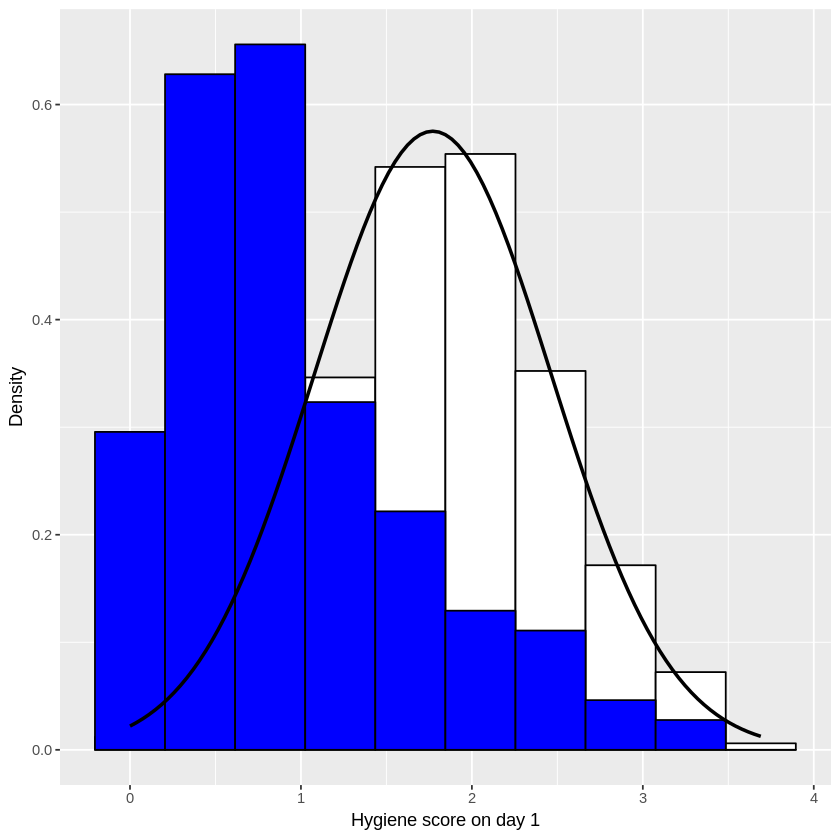

In [13]:
ggplot(dlf, aes(x=day1)) + theme(legend.position='none') +
geom_histogram(aes(y=..density..), color='black', fill='white', bins=10) +
geom_histogram(aes(x=day2, y=..density..), color='black', fill='blue', bins=10) +
labs(x='Hygiene score on day 1', y='Density') +
stat_function(fun=dnorm, args=list(mean=mean(dlf$day1, na.rm=TRUE),
             sd=sd(dlf$day1, na.rm=TRUE)), color='black', size=1)

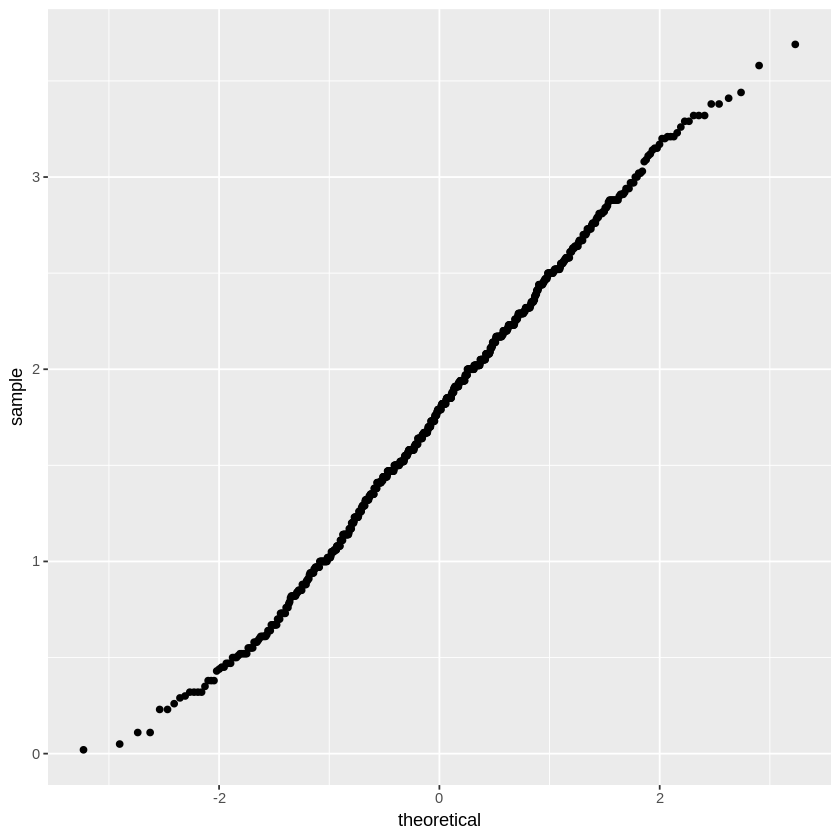

In [19]:
ggplot(dlf, aes(sample=day1)) +
stat_qq()

In [20]:
describe(dlf$day1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,810,1.771136,0.6935389,1.79,1.771929,0.696822,0.02,3.69,3.67,-0.00442835,-0.4215941,0.02436847


In [22]:
stat.desc(dlf$day1, basic=FALSE, norm=TRUE)

median         mean      SE.mean CI.mean.0.95          var      std.dev 
  1.79000000   1.77113580   0.02436847   0.04783289   0.48099624   0.69353892 
    coef.var     skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W 
  0.39157862  -0.00442835  -0.02577395  -0.42159405  -1.22838457   0.99591522 
  normtest.p 
  0.03198482

In [25]:
describe(cbind(dlf$day1, dlf$day2, dlf$day3))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,810,1.7711358,0.6935389,1.79,1.7719290,0.696822,0.02,3.69,3.67,-0.00442835,-0.4215941,0.02436847
X2,2,264,0.9609091,0.7207801,0.79,0.8687264,0.607866,0.00,3.44,3.44,1.08281121,0.7554615,0.04436095
X3,3,123,0.9765041,0.7102770,0.76,0.9021212,0.607866,0.02,3.41,3.39,1.00781273,0.5945454,0.06404352


In [29]:
round(stat.desc(cbind(dlf$day1, dlf$day2, dlf$day3), basic=FALSE, norm=TRUE), digits=3)

,V1,V2,V3
median,1.790,0.790,0.760
mean,1.771,0.961,0.977
SE.mean,0.024,0.044,0.064
CI.mean.0.95,0.048,0.087,0.127
var,0.481,0.520,0.504
std.dev,0.694,0.721,0.710
coef.var,0.392,0.750,0.727
skewness,-0.004,1.083,1.008
skew.2SE,-0.026,3.612,2.309
kurtosis,-0.422,0.755,0.595


In [28]:
class(dlf[, c('day1', 'day2', 'day3')])

[1] "data.frame"

## 5.5.3 Exploring groups of data

In [3]:
rexam = read.delim('data/RExam.dat', header=TRUE)

In [5]:
rexam$uni = factor(rexam$uni, levels=c(0, 1), labels=c('Duncetown University', 'Sussex University'))

In [11]:
stat.desc(rexam, norm=TRUE)

,exam,computer,lectures,numeracy,uni
nbr.val,1.000000e+02,100.0000000,100.00000000,1.000000e+02,NA
nbr.null,0.000000e+00,0.0000000,0.00000000,0.000000e+00,NA
nbr.na,0.000000e+00,0.0000000,0.00000000,0.000000e+00,NA
min,1.500000e+01,27.0000000,8.00000000,1.000000e+00,NA
max,9.900000e+01,73.0000000,100.00000000,1.400000e+01,NA
range,8.400000e+01,46.0000000,92.00000000,1.300000e+01,NA
sum,5.810000e+03,5071.0000000,5976.50000000,4.850000e+02,NA
median,6.000000e+01,51.5000000,62.00000000,4.000000e+00,NA
mean,5.810000e+01,50.7100000,59.76500000,4.850000e+00,NA
SE.mean,2.131557e+00,0.8260035,2.16847774,2.705681e-01,NA


In [15]:
by(rexam$exam, INDICES=rexam$uni, FUN=stat.desc)

rexam$uni: Duncetown University
     nbr.val     nbr.null       nbr.na          min          max        range 
  50.0000000    0.0000000    0.0000000   15.0000000   66.0000000   51.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
2009.0000000   38.0000000   40.1800000    1.7803210    3.5776890  158.4771429 
     std.dev     coef.var 
  12.5887705    0.3133094 
------------------------------------------------------------ 
rexam$uni: Sussex University
     nbr.val     nbr.null       nbr.na          min          max        range 
  50.0000000    0.0000000    0.0000000   56.0000000   99.0000000   43.0000000 
         sum       median         mean      SE.mean CI.mean.0.95          var 
3801.0000000   75.0000000   76.0200000    1.4432079    2.9002348  104.1424490 
     std.dev     coef.var 
  10.2050208    0.1342413 

In [17]:
by(rexam[, c('exam', 'numeracy')], rexam$uni, stat.desc, basic=FALSE, norm=TRUE)

rexam$uni: Duncetown University
                    exam    numeracy
median        38.0000000  4.00000000
mean          40.1800000  4.12000000
SE.mean        1.7803210  0.29226770
CI.mean.0.95   3.5776890  0.58733393
var          158.4771429  4.27102041
std.dev       12.5887705  2.06664472
coef.var       0.3133094  0.50161280
skewness       0.2906760  0.48165960
skew.2SE       0.4317816  0.71547621
kurtosis      -0.7230849 -0.65166313
kurt.2SE      -0.5462122 -0.49226083
normtest.W     0.9721662  0.94081692
normtest.p     0.2828984  0.01451518
------------------------------------------------------------ 
rexam$uni: Sussex University
                    exam     numeracy
median        75.0000000  5.000000000
mean          76.0200000  5.580000000
SE.mean        1.4432079  0.434332704
CI.mean.0.95   2.9002348  0.872824247
var          104.1424490  9.432244898
std.dev       10.2050208  3.071196004
coef.var       0.1342413  0.550393549
skewness       0.2559866  0.746369109
skew.2SE       0.

In [18]:
dunceData = subset(rexam, rexam$uni=='Duncetown University')
sussexData = subset(rexam, rexam$uni=='Sussex University')

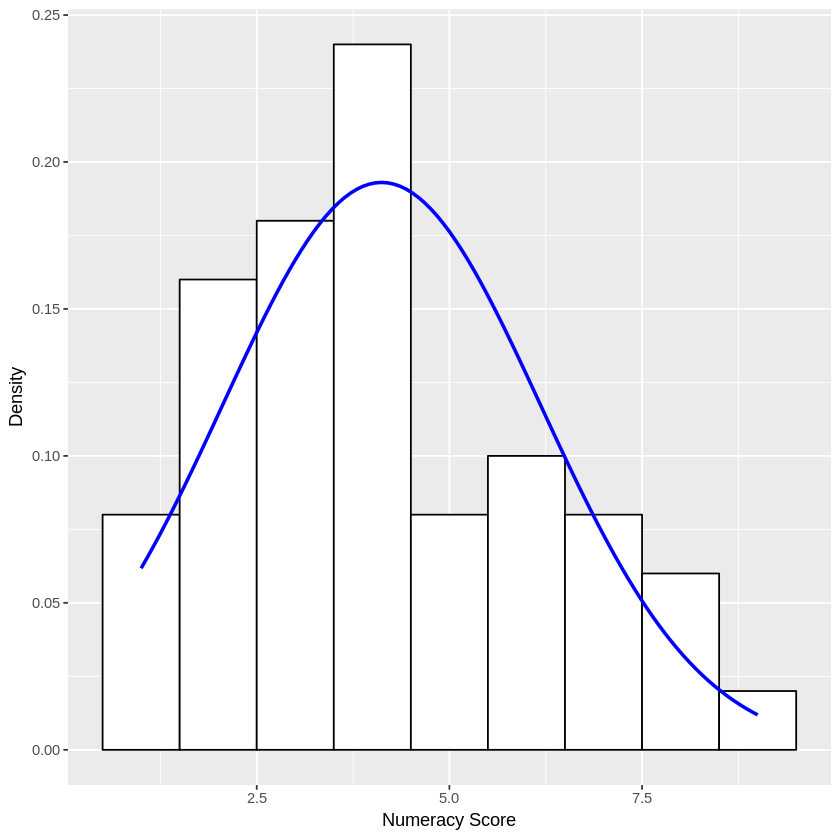

In [25]:
ggplot(dunceData, aes(numeracy)) +
geom_histogram(aes(y=..density..), fill='white', color='black', binwidth=1) +
labs(x='Numeracy Score', y='Density') +
stat_function(fun=dnorm, args=list(mean=mean(dunceData$numeracy, na.rm=TRUE),
                                  sd=sd(dunceData$numeracy, na.rm=TRUE)),
             color='blue', size=1)

In [28]:
shapiro.test(rexam$exam)


	Shapiro-Wilk normality test

data:  rexam$exam
W = 0.96131, p-value = 0.004991


In [29]:
shapiro.test(rexam$numeracy)


	Shapiro-Wilk normality test

data:  rexam$numeracy
W = 0.92439, p-value = 2.424e-05


In [30]:
by(rexam$exam, rexam$uni, shapiro.test)

rexam$uni: Duncetown University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97217, p-value = 0.2829

------------------------------------------------------------ 
rexam$uni: Sussex University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.98371, p-value = 0.7151


In [31]:
by(rexam$numeracy, rexam$uni, shapiro.test)

rexam$uni: Duncetown University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.94082, p-value = 0.01452

------------------------------------------------------------ 
rexam$uni: Sussex University

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.93235, p-value = 0.006787


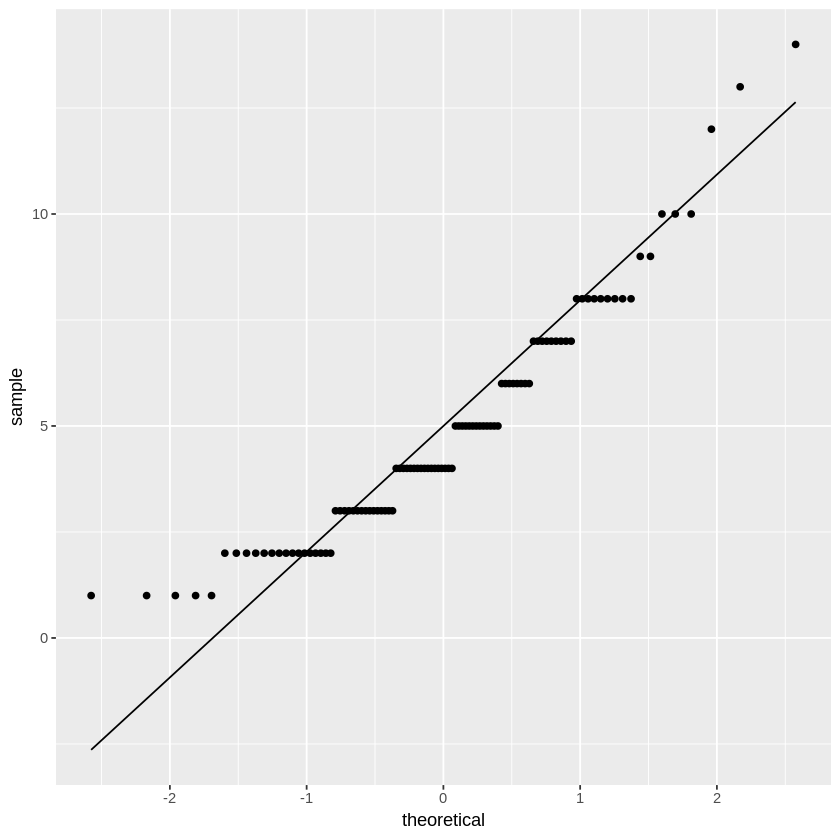

In [38]:
ggplot(rexam, aes(sample=numeracy)) + stat_qq() + stat_qq_line()

In [42]:
leveneTest(rexam$exam, rexam$uni)

,Df,F value,Pr(>F)
group,1,2.088557,0.1515963
,98,NA,NA


In [41]:
leveneTest(rexam$numeracy, rexam$uni)

,Df,F value,Pr(>F)
group,1,5.366045,0.02261525
,98,NA,NA


In [45]:
dim(rexam)

[1] 100   5